#Aula 1-Leyendo archivos CSV

##Importar estos arvhivos

In [ ]:
import pandas as pd
#para importar archivos csv usamos pandas
#ahora utilizaremos el metodos de pandas para utilizar arvhivos csv
datos=pd.read_csv('superstore_data.csv')

#cuando se lee con pandas se vuelve automaticamente en data frame

In [ ]:
datos.head(5)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
#ahora si subimos otro archivo que este este separado por ; y no por , sera que lo leea
datos_punto_coma=pd.read_csv('superstore_data_punto_coma.csv')
datos_punto_coma.head(5)
#los datos no estan similares a como esta la coma, dado que no da la tabla, esto se deriba
#el formato csv intento buscar las comas ya que es el separador de las columnas, como no lo encontro pues asumio que todo era una ssola columna o atributo

,Id;Year_Birth;Education;Marital_Status;Income;Kidhome;Teenhome;Dt_Customer;Recency;MntWines;MntFruits;MntMeatProducts;MntFishProducts;MntSweetProducts;MntGoldProds;NumDealsPurchases;NumWebPurchases;NumCatalogPurchases;NumStorePurchases;NumWebVisitsMonth;Response;Complain
0,1826;1970;Graduation;Divorced;84835;0;0;6/16/2...
1,1;1961;Graduation;Single;57091;0;0;6/15/2014;0...
2,10476;1958;Graduation;Married;67267;0;1;5/13/2...
3,1386;1967;Graduation;Together;32474;1;1;11/5/2...
4,5371;1989;Graduation;Single;21474;1;0;8/4/2014...


###Para saber más: error de codificación - ¿cómo solucionarlo?

Giovanna es una científica de datos que trabaja en una empresa de comercio electrónico. Ella es responsable de analizar datos de ventas para identificar patrones y tendencias que puedan ayudar a la empresa a tomar decisiones informadas.

Recientemente, le asignaron una nueva tarea: analizar un archivo CSV que contiene información sobre las ventas de la empresa durante un período determinado. Para ello, Giovanna intentó leer un archivo CSV en Google Colab, usando la biblioteca Pandas con el siguiente comando:

import pandas as pd
df = pd.read_csv('datos.csv')

Sin embargo, apareció el siguiente error:
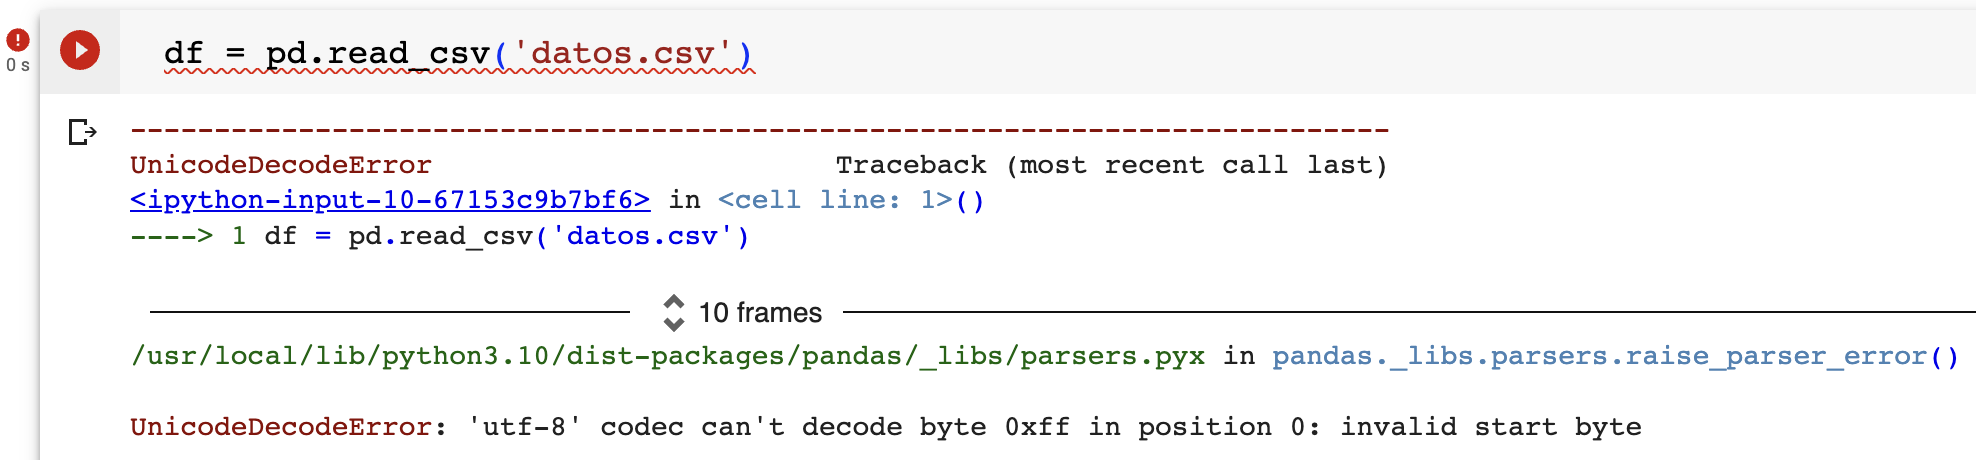

En español, el mensaje significa UnicodeDecodeError: el códec 'utf-8' no puede decodificar el byte 0xff en la posición 0: byte de inicio inválido

Pero ¿qué significa eso? ¿Qué es esto de UTF-8?

El error de encoding ocurre cuando la biblioteca Pandas no puede interpretar correctamente los caracteres en un archivo CSV. Esto puede suceder cuando contiene caracteres especiales que la biblioteca Pandas no reconoce o cuando se guardó en un formato de codificación diferente al esperado.

Para resolver este error, es necesario identificar la codificación correcta del archivo CSV y especificarla al cargar el archivo con la biblioteca Pandas. Esta codificación predeterminada es UTF-8, pero en algunos casos, es posible que el archivo se haya guardado con una codificación diferente, como ISO-8859-1.

UTF-8 es una codificación de caracteres universal que se utiliza para representar caracteres de diferentes idiomas de una manera compatible con Internet y los sistemas de computadora en general. Las siglas UTF significan Unicode Transformation Format (Formato de Transformación Unicode) y el número 8 indica que esta codificación asocia una secuencia de 1 a 4 bytes (8 a 32 bits) a cada carácter.

La codificación UTF-8 se usa ampliamente en Internet y en sistemas informáticos de todo el mundo, ya que permite representar caracteres de diferentes idiomas en un solo conjunto de caracteres. Además, esta codificación puede preservar la compatibilidad con codificaciones más antiguas como ASCII, lo que la convierte en una opción popular para crear y compartir archivos de texto.

Quizás estés pensando ahora mismo: ¿cómo podría Giovanna descubrir cuál es la codificación del archivo que está intentando leer?

Hay algunas formas de resolver esto, sin embargo, tendremos la oportunidad de experimentar una forma práctica de hacerlo en el propio Google Colab. ¿Vamos allá?

Podemos usar una biblioteca llamada chardet para detectar el encoding de un archivo CSV. Para usar esta biblioteca en Google Colab, simplemente importela:

import chardet

Luego escribimos el siguiente bloque de código:

with open('datos.csv', 'rb') as file:
    print(chardet.detect(file.read()))


Observe que la primera línea de este código abre el archivo CSV en modo de lectura binaria rb y asigna el objeto del archivo devuelto a una variable llamada file.

En la segunda línea de código, el contenido del archivo CSV se lee usando el método read() y el resultado se pasa a la función chardet.detect(), que devuelve un diccionario que contiene información sobre la codificación más probable del archivo. El resultado se imprime con la función print() que muestra la codificación y la confianza asociada con esa codificación.

Al ejecutar el código Giovanna obtuvo el siguiente resultado:


{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


Ahora ella sabe que es probable que el archivo CSV esté codificado con UTF-16 con una confianza de 1.0. Para especificar la codificación correcta al cargar el archivo CSV con la biblioteca Pandas, puede utilizar un parámetro llamado encoding:

df = pd.read_csv('datos.csv', encoding='UTF-16')

De esta manera, la biblioteca Pandas cargará el archivo CSV usando la codificación UTF-16, lo que resolverá el error de codificación. Entonces, si alguna vez intentas leer un archivo y obtienes el mismo error, ¡recuerda este consejo!

Si deseas profundizar más en el tema, aquí te dejamos algunos enlaces a materiales

https://www.ime.usp.br/~pf/algoritmos/apend/unicode.html#detection

https://www.ibm.com/docs/pt-br/workload-automation/9.3.0?topic=support-what-is

https://www.kaggle.com/code/alexisbcook/character-encodings/tutorial

##Parametros de la funcion read_csv


documentacion: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [ ]:
#siempre que tengamos problemas con algo vamos a la documentacion
#esta funcion tiene muchos parametros para editar o gestionar los archivos mas de 30
#hoy veremos el parametro sep, es el ssseparador que se utiliza dentro del arvhico, en este caso sera ., pero podemos
#especificar el separador de caracter queremos , por defecto es la , si no lo indicamos dentro de la funcion
datos_punto_coma=pd.read_csv('superstore_data_punto_coma.csv' , sep=';')
datos_punto_coma.head(5)



,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
#otro parametro que podemos explorar es el nrows: el nuemro de filas que quiero leer
datos_primeras_lineas=pd.read_csv('superstore_data.csv', nrows=5)
# no ers necesario usar head por que este solo tendra 5 lineas nuestra variable
datos_primeras_lineas
#solo muestra 5 filas

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
#para trabajar con columnas usecols: es columnas a utilizar, podemos indicar las columnas que queremos atraer para visualizar, es decir solo importamos las columans que queremos trabajr a un archivo
datos_seleccion=pd.read_csv('superstore_data.csv',usecols=['Id','Year_Birth','Income'])#le vamos a indicar las columnas que son las mas importantes para nuestro a nalizis e identificar los clientes con mayor consumo
#con edstas variables conseguimis idebntificar a los mejores clientes, importando todos los registros de ese archivio pero unicamente las 3 columnas que se seleccionaron
datos_seleccion
#que tenemos al final, la cantidad total de los registros per solo se importaron 3 columnas

,Id,Year_Birth,Income
0,1826,1970,84835.0
1,1,1961,57091.0
2,10476,1958,67267.0
3,1386,1967,32474.0
4,5371,1989,21474.0
...,...,...,...
2235,10142,1976,66476.0
2236,5263,1977,31056.0
2237,22,1976,46310.0
2238,528,1978,65819.0


In [ ]:
#otra cosa que podemos hacer con usecols es colocar la posicion de la columna y no el nombre
datos_seleccion=pd.read_csv('superstore_data.csv',usecols=[0,1,4])
datos_seleccion

,Id,Year_Birth,Income
0,1826,1970,84835.0
1,1,1961,57091.0
2,10476,1958,67267.0
3,1386,1967,32474.0
4,5371,1989,21474.0
...,...,...,...
2235,10142,1976,66476.0
2236,5263,1977,31056.0
2237,22,1976,46310.0
2238,528,1978,65819.0


##Escribiendo archivo csv

In [ ]:
#queremos guardar las variables mas improtantes para su analisis o muestra posterior
datos_seleccion.to_csv('clientes_mercado.csv')#recordando read para leer to para escribir

In [ ]:
clientes_mercado=pd.read_csv('/content/clientes_mercado.csv')
clientes_mercado
#se nos metio una variable la cual es el unamed :0 al analisarla es el valor de nuestro indice
#nuestro indice se transformo en una nueva columna para complicarnos un poco la vida

,Unnamed: 0,Id,Year_Birth,Income
0,0,1826,1970,84835.0
1,1,1,1961,57091.0
2,2,10476,1958,67267.0
3,3,1386,1967,32474.0
4,4,5371,1989,21474.0
...,...,...,...,...
2235,2235,10142,1976,66476.0
2236,2236,5263,1977,31056.0
2237,2237,22,1976,46310.0
2238,2238,528,1978,65819.0


In [ ]:
#que podemos hacer, revisar el documento de la documentacion para resolverlo
#buscamos el index=True lo que nos dice es que al momento de crear la funcion to_csv
#nos crea un indice pero si no la queremos tenemos que usar la funcion inde=False
#dado que si no se indica la funcion to_csv crara un indice

In [ ]:
datos_seleccion.to_csv('datos_mercado.csv', index=False)

In [ ]:
datos_mercado=pd.read_csv('datos_mercado.csv')

In [ ]:
datos_mercado #ahora no lo tenemos con el indice, solo tenemos als columnas originales seleccionada

,Id,Year_Birth,Income
0,1826,1970,84835.0
1,1,1961,57091.0
2,10476,1958,67267.0
3,1386,1967,32474.0
4,5371,1989,21474.0
...,...,...,...
2235,10142,1976,66476.0
2236,5263,1977,31056.0
2237,22,1976,46310.0
2238,528,1978,65819.0


La biblioteca Pandas es una de las herramientas más poderosas disponibles para análisis de datos en Python. Ofrece una amplia variedad de funciones que hacen que el proceso de manipulación y análisis de datos sea mucho más fácil y eficiente.

Para aprovechar al máximo todas las funciones de la biblioteca, es esencial explorar su documentación, que es extensa y está bien organizada, y a la que se puede acceder fácilmente en línea. Consulta las indicaciones:

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

Explorar la documentación de la biblioteca es importante por varias razones. Puede ayudarle a comprender cómo las funciones y métodos de la biblioteca funcionan y cómo se pueden utilizar para analizar y manipular datos.

Además, la documentación proporciona detalles sobre los parámetros de cada función y ejemplos de cómo se pueden utilizar en la práctica. Entonces, intenta profundizar tus estudios sobre los parámetros de cada función read_csv y to_csv y aprende más sobre cada uno de ellos.

In [ ]:
import chardet
with open('/content/Informacion de salus(tabnet)-datuss practica.csv', 'rb') as file:
    print(chardet.detect(file.read()))


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [ ]:
url='/content/Informacion de salus(tabnet)-datuss practica.csv'


engine='python': el motor utilizado para leer el archivo es Python. Esto es necesario cuando se utiliza el parámetro skipfooter, ya que el motor predeterminado no admite esta opción.

Es hora de que pongas a prueba los conocimientos desarrollados durante la clase. Disponemos de un archivo en formato CSV https://raw.githubusercontent.com/alura-es-cursos/1980-Pandas_IO/datos_sus/datos_sus.csv, el cual se obtuvo de la página Información de Salud (TABNET) - DATASUS:https://datasus.saude.gov.br/informacoes-de-saude-tabnet/. Este archivo contiene los gastos hospitalarios públicos de cada una de las Unidades de la Federación Brasileña desde enero de 2008 hasta marzo de 2021.

Su desafío aquí será leer este archivo usando la función read_csv de la biblioteca Pandas. Se deben agregar algunos parámetros para que la lectura se realice correctamente. Entonces, aquí hay algunos consejos:

Asegúrese de que el archivo CSV esté separado por una coma o punto y coma.
La codificación del archivo es ISO-8859-1.
Las primeras tres líneas del archivo se pueden ignorar, ya que el encabezado sólo comienza en la cuarta línea.
Las últimas 9 líneas también se pueden ignorar, ya que son sólo información sobre dónde se tomaron los datos.
Para eliminar las últimas líneas es necesario agregar el parámetro engine='python'.

In [ ]:
datos_salud=pd.read_csv(url,encoding='ISO-8859-1',sep=';',skiprows=3,skipfooter=9,engine='python')

In [ ]:
datos_salud

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,"1388528,39","2931283,42","1541682,52","1525314,96","1645953,84","1406150,68","3065279,01","3231494,61","3117178,63",...,"11824687,13","11733307,76","10201985,14","7955139,45","9357946,29","8880836,55","9266014,59","7730597,04","11023309,47","996411254,68"
1,Acre,"902416,00","1497206,26","1794028,48","1730469,42","1819443,92","1828496,00","2511754,59","2089107,14","2275708,53",...,"3915193,20","3640142,82","3391242,21","4044321,44","3276590,10","3696997,31","3715723,12","3538427,92","4077045,92","450048530,47"
2,Amazonas,"4735529,42","7118990,57","8196635,49","8259378,42","7831399,90","8477273,62","9368858,72","9352532,70","9363099,35",...,"19769460,14","18059931,43","17841015,63","16408315,10","19895617,91","17765167,69","21430289,17","25917134,55","22032176,22","1917247936,05"
3,Roraima,"657889,53","777939,31","718688,03","839994,39","862347,96","832440,66","996693,09","894271,18","910424,17",...,"3015488,30","2826486,18","2928043,91","3090313,73","3621031,05","3454460,94","3266928,47","3519773,73","3985530,08","328876965,09"
4,Pará,"18864744,11","19553758,20","21937342,70","20842829,69","23249952,88","23240687,56","24002223,56","23341218,03","25172261,32",...,"40804126,43","44385715,88","36820249,47","36965931,34","39004315,80","38015145,79","38354682,46","37688314,23","33276392,89","4705309002,29"
5,Amapá,"1120973,34","1268740,33","974651,24","1141137,32","866346,18","1440978,95","1426659,48","1475551,38","1651341,43",...,"3253399,45","2946398,44","2416019,23","2203732,04","2218532,26","2566919,60","2802886,34","2817849,31","3188210,98","309860092,59"
6,Tocantins,"3441592,69","4985688,85","6205612,60","4984482,09","5511002,46","4927934,22","5445602,28","5413710,38","5596669,50",...,"9155572,36","8390267,72","8729632,49","7770885,66","527840,46","675277,05","419553,49","319160,87","1357751,33","1020028272,64"
7,Maranhão,"10723506,39","13559679,41","13985142,36","14809416,46","14505727,38","14908091,32","15784899,40","15195312,89","14951277,75",...,"35473489,49","32219037,29","30077152,72","33200778,47","31942670,33","30783403,58","30738750,31","30924484,99","39663677,48","3871069498,04"
8,Piauí,"7985142,43","10079928,25","10298372,45","10775976,33","10398360,88","10528253,88","11040107,92","10549176,40","10899198,97",...,"19908573,27","25663537,49","20230782,72","22389215,72","18911604,50","20883972,79","22689390,32","19400269,01","20018325,75","2280888802,74"
9,Ceará,"15539821,90","25735101,55","28724625,75","30676457,06","30604453,47","31272395,18","30925391,36","27851438,72","30362719,90",...,"56019506,33","61719491,69","56625919,77","59074596,33","56916499,66","50849353,22","52078218,88","53171253,41","62079618,54","6591836650,18"


encoding='ISO-8859-1': tipo de codificación de caracteres del archivo. En este caso, es la codificación ISO-8859-1 la que es común en los archivos en idioma portugués.
sep=';': separador de los valores del archivo. En este caso, es el punto y coma (;).
skiprows=3: indica que las primeras tres líneas del archivo deben ignorarse ya que no contienen datos relevantes.
skipfooter=9: Indica que las últimas nueve líneas del archivo deben ignorarse ya que no contienen datos relevantes.
engine='python': el motor utilizado para leer el archivo es Python. Esto es necesario cuando se utiliza el parámetro skipfooter, ya que el motor predeterminado no admite esta opción.

En esta aula, aprendimos:

Entender qué es un archivo CSV;
Leer un archivo en formato CSV separado por comas y punto y coma;
Leer sólo unas pocas líneas y también columnas específicas de un archivo en formato CSV;
Escribir un archivo en formato CSV.

#Aula 2 -Leyendo archivos Excel

##Importando archivos Exel

In [ ]:
#vamos a analisas una base de datos de emiciones para saber que paises realizan politicas de emision ambiental
#el cual esta en un formato exel
#Exel libro de hoja de calculo
#la extencion xlsx es un archivo de exel

In [ ]:
archivo='/content/emisiones_CO2.xlsx'


In [ ]:
datos_CO2=pd.read_excel(archivo)

In [ ]:
datos_CO2.head(5) #esta se vuelve automaticamente se vuelve un data frame, por que esto solo devuelve un data frame


,País,ISO 3166-1 alpha-3,Año,Total,Carbón,Aceite,Gas,Cemento,Quema,Otros,Per Capita
0,Afganistán,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afganistán,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afganistán,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afganistán,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afganistán,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#para saber que tipo de hoja estoy viendo puedo exminar que hoja tengo o visualizo con el metodo
pd.ExcelFile(archivo).sheet_names#donde nos devolvera el nombre de las hojas con las cuales trabajaremos dado que son lass que contiene



['emisiones_C02', 'emisiones_percapita', 'fuentes']

#### profundizando en la funcion read_exel

Microsoft Excel es una de las herramientas de hojas de cálculo más utilizadas en el mundo, siendo ampliamente utilizada para almacenar y analizar datos en formato de tabla. En el video anterior, mostramos cómo la función read_excel se puede usar para leer un archivo de Excel en formato xlsx. Sin embargo, esta función es capaz de leer archivos en otros formatos, como: xls, xlsm, xlsb, odf, ods y odt.

¿Vamos a entender un poco más sobre estos diferentes tipos de archivos?

xls

El formato xls es un formato de archivo de Excel más antiguo y se utilizó hasta la versión de 2003.

xlsx

El formato xlsx es el formato de archivo de Excel predeterminado a partir de la versión 2007. Este formato se basa en XML(Extensible Markup Language - Lenguaje de marcación extensible) y es ampliamente compatible con otras herramientas de hojas de cálculo online, incluida Google Sheets.

Atención : Si tienes dudas sobre el término XML, ¡no te preocupes! Tendremos un aula sobre este tema más adelante. En ella entenderás qué es este formato, cómo leer y escribir en XML.

xlsm

También existe xlsm, una extensión de archivo utilizada por Excel para almacenar hojas de cálculo que contienen macros. Son secuencias de comandos o instrucciones que se pueden ejecutar automáticamente para realizar tareas específicas en la hoja de trabajo.

Entonces, el formato xlsm permite guardar las macros junto con la hoja de trabajo, de modo que puedan ejecutarse cada vez que se abra la hoja de trabajo.

xlsb

Por último, tenemos el formato xlsb, una extensión de archivo que utiliza Excel para almacenar hojas de cálculo en formato binario. La codificación binaria permite abrir y guardar hojas de cálculo más rápido que aquellas en formato xlsx.

Los formatos odf, ods y odt son archivos abiertos, gratuitos y universales que pueden ser utilizados por cualquier software, es decir, fueron creados para ser independientes de plataformas, esto quiere decir que pueden ser utilizados en diferentes sistemas operativos, como Windows, Linux y Mac OS.

Además, son independientes de aplicaciones y se pueden utilizar en muchos programas diferentes, incluidos OpenOffice, LibreOffice, Google Docs y Microsoft Office. Este estándar de archivos fue creado y es mantenido por OASIS (Organization for the Advancement of Structured Information Standards), una organización internacional creada para desarrollar y promover estándares digitales para su uso en Internet.

¡Muy bien! Ahora sabemos un poco más sobre todos los tipos de archivos que se pueden leer con la función read_excel.

Si deseas profundizar más en el tema, aquí te dejamos algunos enlaces a materiales que fueron utilizados como referencia:

https://support.microsoft.com/es-es/office/formatos-de-archivo-que-admite-excel-0943ff2c-6014-4e8d-aaea-b83d51d46247

https://pt.wikipedia.org/wiki/OpenDocument

In [ ]:
#pero si yo quiero ver las otras hojas dado que ahorita solo vemos la primera hoja

##Parametros de la funcion read_exel
https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

In [ ]:
#sheet_name=0 es el parametro que nos permite abrir las hojas del archivo, esto va de 0 a n
percapita=pd.read_excel(archivo,sheet_name='emisiones_percapita')

In [ ]:
percapita.tail(
)

,País,ISO 3166-1 alpha-3,Año,Total,Carbón,Aceite,Gas,Cemento,Quema,Otros
63099,Global,WLD,2017,4749682.0,1908857.0,1610910.0,940144.0,198416.0,51579.0,39776.0
63100,Global,WLD,2018,4792753.0,1919213.0,1596350.0,979965.0,204225.0,53634.0,39366.0
63101,Global,WLD,2019,4775633.0,1896468.0,1589920.0,984878.0,208309.0,56569.0,39490.0
63102,Global,WLD,2020,4497423.0,1807760.0,1427353.0,963695.0,208844.0,51981.0,37789.0
63103,Global,WLD,2021,4693699.0,1893923.0,1496614.0,1001585.0,211472.0,52663.0,37443.0


In [ ]:
percapita.sample(5) #ejecuta elementos aleatorios de la tabla

,País,ISO 3166-1 alpha-3,Año,Total,Carbón,Aceite,Gas,Cemento,Quema,Otros
45548,Corea Del Sur,KOR,1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49472,Arabia Saudita,SAU,1990,13027184.0,0.0,6960444.0,5674305.0,363590.0,28845.0,NaN
24780,Hungría,HUN,1778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48156,Santa Lucía,LCA,1762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38442,Naurú,NRU,1840,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
funetes_para_fuentes=pd.read_excel(archivo,sheet_name='fuentes')
funetes_para_fuentes.tail()

,País,ISO 3166-1 alpha-3,Año,Total,Carbón,Aceite,Gas,Cemento,Quema,Otros,Per Capita
63099,Global,WLD,2017,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63100,Global,WLD,2018,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63101,Global,WLD,2019,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63102,Global,WLD,2020,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63103,Global,WLD,2021,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."


In [ ]:
intervalo=percapita=pd.read_excel(archivo,sheet_name='emisiones_C02',usecols= 'A:D')#para seleccionar entre intervalos, seleccionamos omo en exel de A-D

In [ ]:
intervalo

,País,ISO 3166-1 alpha-3,Año,Total
0,Afganistán,AFG,1750,0.000000e+00
1,Afganistán,AFG,1751,0.000000e+00
2,Afganistán,AFG,1752,0.000000e+00
3,Afganistán,AFG,1753,0.000000e+00
4,Afganistán,AFG,1754,0.000000e+00
...,...,...,...,...
63099,Global,WLD,2017,3.609674e+10
63100,Global,WLD,2018,3.682651e+10
63101,Global,WLD,2019,3.708256e+10
63102,Global,WLD,2020,3.526409e+10


In [ ]:
intervalo2=percapita=pd.read_excel(archivo,sheet_name='emisiones_C02',usecols= 'A:D',nrows=10)#aqui guardamos solo 10 filas con las 4 columnas


In [ ]:
intervalo2

,País,ISO 3166-1 alpha-3,Año,Total
0,Afganistán,AFG,1750,0
1,Afganistán,AFG,1751,0
2,Afganistán,AFG,1752,0
3,Afganistán,AFG,1753,0
4,Afganistán,AFG,1754,0
5,Afganistán,AFG,1755,0
6,Afganistán,AFG,1756,0
7,Afganistán,AFG,1757,0
8,Afganistán,AFG,1758,0
9,Afganistán,AFG,1759,0


##Escribiento archivo exel

In [ ]:
intervalo.to_excel('co2_percapita.xlsx',index=False)

In [ ]:
pd.read_excel('co2_percapita.xlsx')

,País,ISO 3166-1 alpha-3,Año,Total
0,Afganistán,AFG,1750,0.000000e+00
1,Afganistán,AFG,1751,0.000000e+00
2,Afganistán,AFG,1752,0.000000e+00
3,Afganistán,AFG,1753,0.000000e+00
4,Afganistán,AFG,1754,0.000000e+00
...,...,...,...,...
63099,Global,WLD,2017,3.609674e+10
63100,Global,WLD,2018,3.682651e+10
63101,Global,WLD,2019,3.708256e+10
63102,Global,WLD,2020,3.526409e+10


####importando hacia Google Sheets

Google Sheets es una herramienta de hojas de cálculo online basada en nube que le permite crear, editar y colaborar en hojas de cálculo de manera fácil y conveniente. Es una de las aplicaciones de Google Workspace que ofrece una alternativa a Microsoft Excel.

Con Google Sheets se puede crear y formatear hojas de cálculo, agregar fórmulas y funciones, crear gráficos y tablas dinámicas y trabajar con otros usuarios con datos en tiempo real. También admite la importación y exportación de varios formatos de archivos, como CSV y XLSX.

Una de las principales ventajas de Google Sheets es la colaboración en tiempo real. Varias personas pueden trabajar simultáneamente en la misma hoja de trabajo y ver los cambios simultáneamente. Esto facilita el trabajo en proyectos de equipo, aumentando la eficiencia y la productividad.

Para importar el archivo de Excel emisiones_CO2.xlsx hacia Google Sheets, siga estos pasos:

Abra la página de Google Sheets y haga clic en "Ir a Sheets". Inicie sesión en su cuenta de Google si es necesario.
Haga clic en Nueva Hoja de cálculo en blanco.
Cuando haya abierto, haga clic en "Archivo" (File) en el menú superior y luego haga clic en la opción "Importar archivo" (Import).
Haga clic en la pestaña "Subir" (Upload) y seleccione el archivo que desea importar. Puede hacer clic en la opción Examinar para ubicar el archivo en su computadora o arrastrar el archivo dentro de la pestaña.
Espere mientras se carga el archivo. Cuando se complete la carga, verá un mensaje de confirmación y podrá hacer clic en "Importar datos" (Import data).
Después de importar, se mostrarán los datos.
¡Excelente! Los datos se han importado correctamente. En el siguiente video, aprenderá cómo leer estos datos en Google Colab usando el link para compartir de Google Sheets.

##Leyendo datos de google sheets

para usar la hoja de google sheets le damos compartir y solo seleccionamos cualquier puede leerlo y copiamos el link
https://docs.google.com/spreadsheets/d/1huXLnlPaKhU57GulvVkrWjzWaYUf9n4v/edit?usp=sharing&ouid=107658086290563606009&rtpof=true&sd=true

y solo nos vamos a quedar con solo el id
el cual esta escondido en el link, lo encontramos entre la letra y el diagonal d/-/
que es el id, es el identificador de mi exel

In [ ]:
sheet_id='1huXLnlPaKhU57GulvVkrWjzWaYUf9n4v'
url= f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet'
#el edit sharin no sirve, nosotros debemos usar la api que nos permite interartuar con google colab
#gviz/tq sinedo esta una palabra clave que nos dice que esta conectando una planilla de exel para la visualizacion dentro de google colab
#otrass cosa que debemos adicionar es un parametro de la url, adicionamos el formato de salida de como queremos leer en google colab, si lo queremos leer como texto, como exel, etc
#&agregamos este simbolo y sheet dado que assi agregamoss o especificamos la hoja o la primera hoja, dadoq ue cuando no especificamos que hoja, solo usamos la primera

In [ ]:
daots_Co2_sheet=pd.read_csv(url)

In [ ]:
daots_Co2_sheet

,País,ISO 3166-1 alpha-3,Año,Total,Carbón,Aceite,Gas,Cemento,Quema,Otros,Per Capita
0,Afganistán,AFG,1750,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afganistán,AFG,1751,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afganistán,AFG,1752,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afganistán,AFG,1753,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afganistán,AFG,1754,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36.096.739.276,14.506.973.805,12.242.627.935,7.144.928.128,1.507.923.185,391.992.176,302.294.047,4.749.682
63100,Global,WLD,2018,36.826.506.600,14.746.830.688,12.266.016.285,7.529.846.784,1.569.218.392,412.115.746,302.478.706,4.792.753
63101,Global,WLD,2019,37.082.558.969,14.725.978.025,12.345.653.374,7.647.528.220,1.617.506.786,439.253.991,306.638.573,4.775.633
63102,Global,WLD,2020,35.264.085.734,14.174.564.010,11.191.808.551,7.556.290.283,1.637.537.532,407.583.673,296.301.685,4.497.423


In [ ]:
sheet_id='1huXLnlPaKhU57GulvVkrWjzWaYUf9n4v'
sheet_name='emisiones_percapita'
url_percapita= f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
#para abrir una hoa del arvhico en especifico vamos hacer una modificacion adicionando la variable sheet_name, que seria el nombre de la hoja
#agregamos en el link en sheet= variable para asi especificar la hoja que queremos


In [ ]:
percapita_sheet=pd.read_csv(url_percapita)
percapita_sheet

,País,ISO 3166-1 alpha-3,Año,Total,Carbón,Aceite,Gas,Cemento,Quema,Otros
0,Afganistán,AFG,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afganistán,AFG,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afganistán,AFG,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afganistán,AFG,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afganistán,AFG,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,4.749.682,1.908.857,1.610.910,940.144,198.416,51.579,39.776
63100,Global,WLD,2018,4.792.753,1.919.213,1.596.350,979.965,204.225,53.634,39.366
63101,Global,WLD,2019,4.775.633,1.896.468,1.589.920,984.878,208.309,56.569,39.490
63102,Global,WLD,2020,4.497.423,1.807.760,1.427.353,963.695,208.844,51.981,37.789


In [ ]:
sheet_id='1huXLnlPaKhU57GulvVkrWjzWaYUf9n4v'
sheet_name='fuentes'
url_fuentes= f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [ ]:
fuentes_sheet=pd.read_csv(url_fuentes)
fuentes_sheet.head(6)

,País,ISO 3166-1 alpha-3,Año,Total,Carbón,Aceite,Gas,Cemento,Quema,Otros,Per Capita
0,Afganistán,AFG,1750,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
1,Afganistán,AFG,1751,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
2,Afganistán,AFG,1752,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
3,Afganistán,AFG,1753,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
4,Afganistán,AFG,1754,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
5,Afganistán,AFG,1755,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]


In [ ]:
fuentes_sheet.tail()

,País,ISO 3166-1 alpha-3,Año,Total,Carbón,Aceite,Gas,Cemento,Quema,Otros,Per Capita
63099,Global,WLD,2017,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63100,Global,WLD,2018,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63101,Global,WLD,2019,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63102,Global,WLD,2020,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63103,Global,WLD,2021,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."


### practica leyendo datos

Es hora de que pongas a prueba los conocimientos desarrollados durante la clase. Tenemos un link de Google Sheets que contiene datos importantes sobre las emisiones de dióxido de carbono en todo el mundo. El conjunto de datos se obtuvo de Kaggle y consta de las emisiones de CO2 per cápita de todos los países del mundo entre 1990 y 2019.
https://cdn3.gnarususercontent.com.br/1980-pandas-e-s/emisiones_carbono_mundo.xlsx

In [ ]:
id_sheet='11V7aUg7ji9Y5jICkt9t1cAnNFFALwBkY'
url_emiciones_co2_percapita_mundo=f'https://docs.google.com/spreadsheets/d/{id_sheet}/gviz/tq?tqx=out:csv&sheet'

In [ ]:
mundo_emiciones_co2__percapita=pd.read_csv(url_emiciones_co2_percapita_mundo)

In [ ]:
mundo_emiciones_co2__percapita

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),191.745.115,167.681.579,95.957.742,8.472.111,75.545.827,68.467.956,...,29.650.624,259.295.334,18.562.366,146.235.617,172.896.741,149.789.334,131.694.556,1.632.953,159.824.372,159.824.372
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),553.661.955,544.538.649,543.557.223,70.898.423,836.804.405,912.141.485,...,985.522.312,950.695.879,1.036.293.852,1.099.779.111,113.504.405,1.031.811.348,81.330.073,777.674.934,792.137.069,792.137.069
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819.541.634,124.281.022,683.699.826,638.307.036,645.355.189,605.436.253,...,166.942.319,150.324.046,1.533.630.039,1.668.337.371,160.377.515,1.557.664.358,1.788.786.074,1.782.738.948,169.224.832,169.224.832
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521.831.658,723.537.924,69.630.787,6.724.177.518,6.541.578.914,6.733.479.486,...,5.850.886.105,5.944.654.173,5.942.800.412,5.807.127.723,6.026.181.822,6.080.600.282,6.104.133.912,6.362.975.399,6.481.217.432,6.481.217.432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Samoa,WSM,East Asia & Pacific,CO2 emissions (metric tons per capita),55.283.574,609.756.098,604.266.119,658.221.486,592.806.881,705.674.802,...,1.066.843.067,1.057.703.002,1.048.701.723,1.092.498.145,1.240.245.954,1.542.099.372,1.586.830.344,1.478.626.161,1.522.124.134,1.522.124.134
211,"Yemen, Rep.",YEM,Middle East & North Africa,CO2 emissions (metric tons per capita),56.703.735,690.937.429,704.793.064,627.104.927,653.255.714,706.080.534,...,963.978.488,858.490.955,1.106.687.715,1.062.211.282,511.361.652,399.363.829,359.621.635,341.068.402,380.633.361,380.633.361
212,South Africa,ZAF,Sub-Saharan Africa,CO2 emissions (metric tons per capita),6.729.798.587,6.424.621.766,6.175.429.944,6.219.193.872,6.215.847.077,6.378.789.568,...,7.869.815.906,8.077.957.969,8.138.264.312,8.212.241.156,7.669.937.662,7.563.739.495,7.641.675.086,7.515.678.605,7.507.736.092,7.507.736.092
213,Zambia,ZMB,Sub-Saharan Africa,CO2 emissions (metric tons per capita),340.929.635,349.232.211,33.722.439,289.956.061,241.269.619,234.153.214,...,217.496.732,27.860.069,284.057.568,304.549.552,312.354.964,325.114.844,404.067.778,445.489.133,380.717.051,380.717.051


En esta aula, aprendimos a:

Entender lo qué es una hoja de cálculo;
Leer un archivo en formato XLSX;
Identificar páginas en una hoja de trabajo;
Leer páginas e intervalos específicos de una hoja de trabajo;
Leer sólo unas pocas líneas de una hoja de cálculo;
Escribir un archivo en formato XLSX;
Importar datos de Google Sheets.

#Aula 3- Leyendo archivos JSON

##importanto archivos JSON

que son esstos archivos?
es una notacion de objetos utilizando el lenguaje java script

la ventaja de usar este formato, es una forma de escritura muy ligera, pra transmitir datos de un sofwere a otro, mediante api, esto es necesario dado que debe ser lo mas ligero posible el formato para viajar de un sistema a otro o maquina a maquina

al abrir el archivo nos damos cuenta que abre y cierra con [] es decri es un diccionario y tiene una variable

la formad e escribir un json se divide en dos llave y valor
llave:usada para buscar una informacion especifica
valor: son los datos proporcionados a la llave, que nos proporciona el identificador

podemos visualizar archivos json mediante la pagina https://jsonviewer.stack.hu/
agrgando los datos, dandole en format

In [ ]:
#como leemos estos datos
import pandas as pd
datos_pacientes=pd.read_json('/content/pacientes.json')

In [ ]:
datos_pacientes

,ID_paciente,Enfermedad_corazon,IMC,Fumador,Consumo_alcohol,AVC,Salud_fisica,Salud_mental,Dificultad_caminar,Sexo_biologico,Rango_edad,Raza,Diabetes,Actividad_fisica,Salud_general,Horas_sueño,Asma,Enfermedad_renal,Cancer_piel
0,0,No,16.60,Sí,No,No,3,30,No,Femenino,55-59,Blanca,Sí,Sí,Muy buena,5,Sí,No,Sí
1,1,No,20.34,No,No,Sí,0,0,No,Femenino,80 ó +,Blanca,No,Sí,Muy buena,7,No,No,No
2,2,No,26.58,Sí,No,No,20,30,No,Masculino,65-69,Blanca,Sí,Sí,Razonable,8,Sí,No,No
3,3,No,24.21,No,No,No,0,0,No,Femenino,75-79,Blanca,No,No,Buena,6,No,No,Sí
4,4,No,23.71,No,No,No,28,0,Sí,Femenino,40-44,Blanca,No,Sí,Muy buena,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,No,28.29,Sí,No,No,10,20,No,Femenino,65-69,Negra,Sí,Sí,Razonable,8,No,No,No
996,996,No,25.69,Sí,No,No,0,0,No,Femenino,75-79,Blanca,No,Sí,Excelente,8,No,No,No
997,997,Sí,26.99,No,No,No,1,0,No,Masculino,70-74,Blanca,No,Sí,Muy buena,8,No,No,No
998,998,No,44.29,No,No,No,30,0,Sí,Femenino,70-74,Blanca,Sí,No,Buena,6,Sí,No,No


muchas veces esto no sera facil de vizualizar, dado que una columna contiene aveces un diccionario dentro de esta, es decri, existe informacion anidadas, diccionarios dentro de diccionarios, en caso que tengamos un archivo anidada, lo anterior no funcionaria pero como lo hariamos?

In [ ]:
#archivo con informacion anidada
datos_pacientes2=pd.read_json('/content/pacientes_2.json')

In [ ]:
datos_pacientes2

,Investigación,Año,Pacientes
0,Indicadores clave de enfermedades cardíacas,2020,"{'ID': '01', 'Rango_edad': '55-59', 'Sexo_biol..."
1,Indicadores clave de enfermedades cardíacas,2020,"{'ID': '02', 'Rango_edad': '80 ó +', 'Sexo_bio..."
2,Indicadores clave de enfermedades cardíacas,2020,"{'ID': '03', 'Rango_edad': '65-69', 'Sexo_biol..."


esta tabla tiene diccioanrios dentro del diccionario, detalles dentro de detalles, lo que debsmos hacer es entrar dentro del diccionario y comnezar a retirar la informacion que contiene esta variable.

##Normalizando archivos JSON

necesitamos separar los diccionarios en columnas diferentes, para eso debemos entender el archivo nos apoyaremos con un vizualisador jscrack
https://jsoncrack.com/

donde vemos del lado izquierdo como se compone el archivo y del dlado derecho como se relaciona
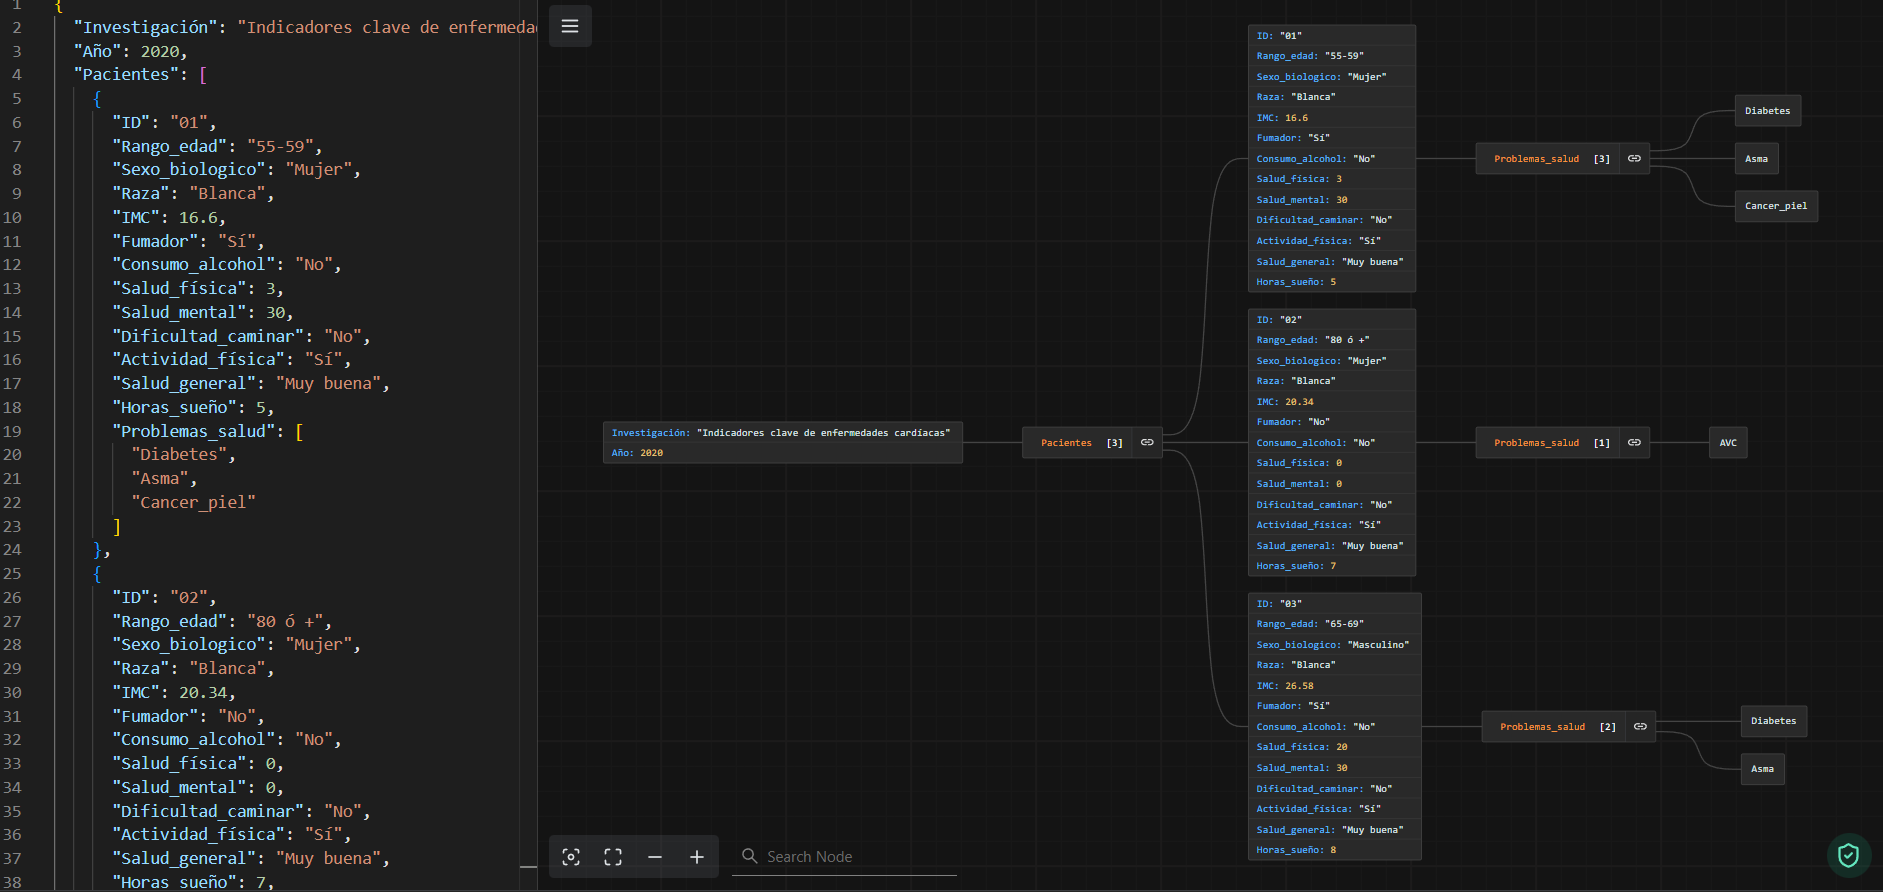

ahora que vizualizamos que el archivo tiene diccionarios dentro de diccionarios que asu ves estan dentro de diccionarios, vamos a trabajar para visualizar

el metodo a utilizar solo funciona con dataframe

In [ ]:
df_normalizado=pd.json_normalize(datos_pacientes2['Pacientes'])# esto normaliza o va a coger la infroamcion y expandir en columnas para cada una de las llaves aunque estas esten anidadas, solo debemos indicar donde esta la columna con problemas


In [ ]:
df_normalizado

,ID,Rango_edad,Sexo_biologico,Raza,IMC,Fumador,Consumo_alcohol,Salud_física,Salud_mental,Dificultad_caminar,Actividad_física,Salud_general,Horas_sueño,Problemas_salud
0,01,55-59,Mujer,Blanca,16.60,Sí,No,3,30,No,Sí,Muy buena,5,"[Diabetes, Asma, Cancer_piel]"
1,02,80 ó +,Mujer,Blanca,20.34,No,No,0,0,No,Sí,Muy buena,7,[AVC]
2,03,65-69,Masculino,Blanca,26.58,Sí,No,20,30,No,Sí,Muy buena,8,"[Diabetes, Asma]"


la funcion json_normalize consigue extraer diccionarios anidados dentro de una columna y separarla en nuevas varioables, atributos o columnas, asiendo que el analisiss sea mas facil de analisar y trabajar

###profundizando en la normalización

La normalización de datos es un proceso importante en la ciencia de datos que tiene como objetivo organizar y estandarizar datos para facilitar el análisis y la comparación entre ellos. Cuando se trata de datos en formato JSON (JavaScript Object Notation - Notación de objetos JavaScript), es común que estén anidados, lo que puede dificultar su análisis y manipulación.

La biblioteca Pandas cuenta con una función llamada json_normalize() que permite la transformación de datos a formato tabular, facilitando la visualización y análisis de las informaciones. A continuación, aprenderemos cómo usar esta función para normalizar diferentes tipos de JSON en DataFrames.

Normalizando un JSON simple

A continuación tenemos una variable llamada datos y dentro de ella hay un objeto JSON con tres llaves y sus respectivos valores:


datos = {'Análisis': 'Principales indicadores de enfermedad cardíaca', 'Año': 2020, 'Numero_Pacientes':3}


Para normalizar esta variable, podemos pasarla dentro de la función json_normalize y analizar el DataFrame obtenido:

df = pd.json_normalize(datos)
df



df = pd.json_normalize(datos)
df

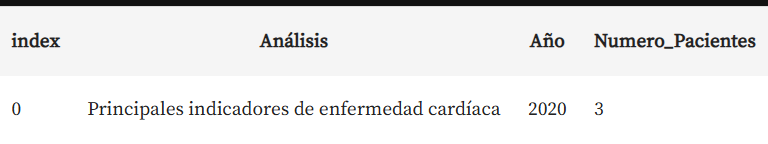

¡El resultado luce genial! Tenemos 3 columnas que son nuestras llaves y una fila que contiene los valores de cada llave.

Normalizando un JSON con múltiples niveles

Hay situaciones en las que el archivo JSON puede contener más de un objeto, como es el caso del siguiente ejemplo, en el que tenemos una lista, almacenada en la variable json_lista, que contiene dos objetos JSON:

json_lista = [
    { 'ID': '01', 'Intervalo_edad': '55-59', 'Sexo_biologico': 'femenino'},
    { 'ID': '02', 'Intervalo_edad': '80 ó +', 'Sexo_biologico': 'femenino'}
]



Para normalizar esta lista podemos aplicar la función json_normalize:


pd.json_normalize(json_lista)
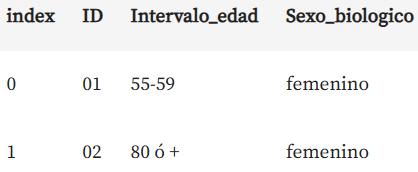


La función json_normalize() es capaz de convertir cada registro de la lista en una línea en forma tabular.

Normalizando un JSON con una lista anidada

Bueno, notamos que la función json_normalize() funciona muy bien en las situaciones anteriores, pero ¿qué pasa en otras situaciones?

Datos como un diccionario

Iniciemos observando la normalización cuando los datos son un diccionario. Tenemos un diccionario almacenado en la variable json_obj. Observe que en la llave “Salud” tenemos otro diccionario:

json_obj = {
    'ID': '01',
    'Intervalo_edad': '55-59',
    'Sexo_biologico': 'Femenino',
    'Salud': {'Dificultad_caminar': 'No',
              'Actividad_fisica': 'Sí',
              'IMC': 16.6,
              'Enfermedad_cardiaca': 'No',
          }
      }

Haciendo la normalización:


pd.json_normalize(json_obj)

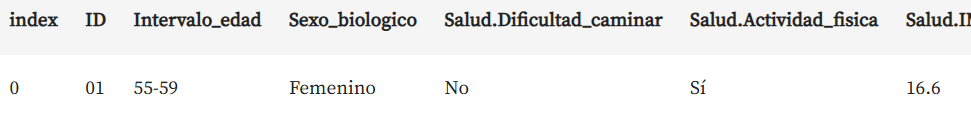


Podemos ver que todos los valores anidados dentro de cada registro de la lista se han convertido en columnas separadas. ¿Qué pasa con los datos que normalizamos en el video anterior? ¿Recuerdas cómo su normalización se hizo de otra manera?

Resumiendo, vamos a copiar los datos del archivo paciente_2.json y vamos a guardarlos en una variable llamada datos_dict.

datos_dict = {
  "Investigación": "Indicadores clave de enfermedades cardíacas",
  "Año": 2020,
  "Pacientes": [
    {
     "ID": "01",
      "Rango_edad": "55-59",
      "Sexo_biologico": "Mujer",
      "Raza": "Blanca",
      "IMC": 16.6,
      "Fumador": "Sí",
      "Consumo_alcohol": "No",
      "Salud_física": 3,
      "Salud_mental": 30,
      "Dificultad_caminar": "No",
      "Actividad_física": "Sí",
      "Salud_general": "Muy buena",
      "Horas_sueño": 5,
      "Problemas_salud": [
        "Diabetes",
        "Asma",
        "Cancer_piel"
      ]
    },
    {
      "ID": "02",
      "Rango_edad": "80 ó +",
      "Sexo_biologico": "Mujer",
      "Raza": "Blanca",
      "IMC": 20.34,
      "Fumador": "No",
      "Consumo_alcohol": "No",
      "Salud_física": 0,
      "Salud_mental": 0,
      "Dificultad_caminar": "No",
      "Actividad_física": "Sí",
      "Salud_general": "Muy buena",
      "Horas_sueño": 7,
      "Problemas_salud": [
        "AVC"
      ]
    },
    {
      "ID": "03",
      "Rango_edad": "65-69",
      "Sexo_biologico": "Masculino",
      "Raza": "Blanca",
      "IMC": 26.58,
      "Fumador": "Sí",
      "Consumo_alcohol": "No",
      "Salud_física": 20,
      "Salud_mental": 30,
      "Dificultad_caminar": "No",
      "Actividad_física": "Sí",
      "Salud_general": "Muy buena",
      "Horas_sueño": 8,
      "Problemas_salud": [
        "Diabetes",
        "Asma"
      ]
    }
  ]
}

Si intentamos normalizar estos datos:

pd.json_normalize(datos_dict)

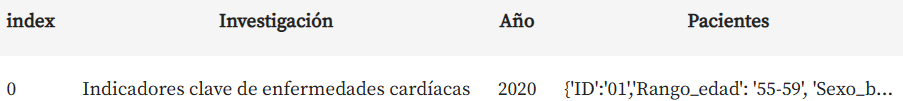

Podemos observar que nuestra lista anidada está colocada en una única columna Pacientes. Entonces, usaremos el siguiente código para normalizar los datos, especificando qué columna está anidada:

pd.json_normalize(datos_dict['Pacientes'])

También podemos hacer esto usando el parámetro record_path como ['Pacientes']. Este parámetro se utiliza en la función pd.json_normalize() para especificar la ruta a los registros que deben ser normalizados en un DataFrame separado:

pd.json_normalize(datos_dict, record_path=['Pacientes'])

Con ambos códigos el resultado es el mismo.


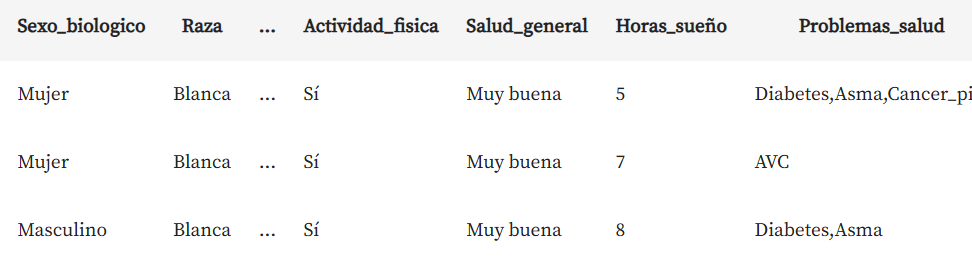

El resultado parece excelente, pero no incluye las columnas "Investigación" y "Año". Para incluirlas, podemos usar el parámetro meta para especificar otras columnas que queramos en el DataFrame.

pd.json_normalize(
    datos_dict,
    record_path =['Pacientes'],
    meta=[‘Investigación’, 'Año']
)
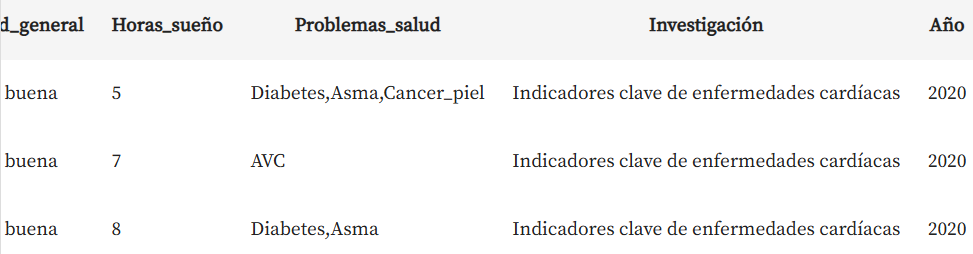

¡De esa manera tenemos todas las columnas presentes en el DataFrame!

Importante: En clase nosotros realizamos la normalización en un archivo con formato JSON. Sin embargo, la función json_normalize() sólo acepta un diccionario o una lista de diccionarios. Por esto, en el video se utilizó la estrategia de usar el código: pd.json_normalize(datos_pacientes_2['Pacientes']). Sin embargo, si intentamos utilizar parámetros de la función json_normalize en un archivo JSON, pueden surgir errores. Para solucionar esto, necesitamos importar el módulo json y leer los archivos según el siguiente código:

**Importando la biblioteca Pandas**
import pandas as pd

**Importando el módulo JSON**
import json

**Leyendo el archivo json usando el módulo Python JSON**

with open('pacientes_2.json','r') as f:
    datos = json.loads(f.read())

**Normalizando los datos con los parámetros record_path y meta**
pd.json_normalize(datos, record_path='Pacientes', meta=['Investigación', 'Año'])

Y fue así que aprendimos cómo normalizar archivos JSON simples, con múltiples niveles y anidados.


# Escribiendo archivos json

In [ ]:
df_normalizado.to_json('histoial_pacientes_nomr.jaon')

In [ ]:
df_normalizado.to_excel('historial de pacientes.xlsx')

In [ ]:
df_normalizado.to_csv('historial de pacientes.csv',index=False)

In [ ]:
pd.read_json('/content/histoial_pacientes_nomr.jaon')

,ID,Rango_edad,Sexo_biologico,Raza,IMC,Fumador,Consumo_alcohol,Salud_física,Salud_mental,Dificultad_caminar,Actividad_física,Salud_general,Horas_sueño,Problemas_salud
0,1,55-59,Mujer,Blanca,16.60,Sí,No,3,30,No,Sí,Muy buena,5,"[Diabetes, Asma, Cancer_piel]"
1,2,80 ó +,Mujer,Blanca,20.34,No,No,0,0,No,Sí,Muy buena,7,[AVC]
2,3,65-69,Masculino,Blanca,26.58,Sí,No,20,30,No,Sí,Muy buena,8,"[Diabetes, Asma]"


##obteniendo archivos JSON de APIs

Para obtener datos en formato JSON podemos utilizar una API (Application Programming Interface). Es una interfaz de programación de aplicaciones que permite la comunicación entre diferentes programas o sistemas.

Hay varios formatos que se pueden utilizar en las API y uno de los más comunes es JSON (JavaScript Object Notation). JSON es un formato ligero para intercambiar información entre sistemas que utiliza la notación basada en objetos de JavaScript.

Tenemos la siguiente situación-problema:

“Una empresa de alimentos saludables tiene problemas con la popularidad de sus productos. A pesar de ofrecer opciones saludables, muchos clientes se muestran reacios a comprar los productos debido a la falta de información sobre los valores nutricionales de las frutas que se utilizan en la producción de alimentos”.

Ante esta situación podemos acceder a una API llamada Fruitvice(https://fruityvice.com/) para recopilar información detallada sobre los valores nutricionales de las frutas que se utilizan en los productos. Con esta información, la empresa podrá actualizar sus empaques y materiales de marketing para resaltar los valores nutricionales de las frutas y así atraer más clientes que buscan opciones saludables. Además, la empresa puede utilizar la información para desarrollar nuevos productos que satisfagan aún más las necesidades nutricionales de su clientela.

Una forma común de acceder a las API es a través de la biblioteca requests(https://pypi.org/project/requests/). Para eso, también es necesario importar el módulo json:



```
import requests
import json
```



Los datos de API Fruitvice se obtendrán con la función request.get('url'). Dentro de ella pasamos la dirección API seguida de **api/fruit/all** para obtener los datos de todas las frutas.

```
datos_frutas = requests.get('https://fruityvice.com/api/fruit/all')
```



In [ ]:
import requests
import json
import pandas as pd
datos_frutas = requests.get('https://fruityvice.com/api/fruit/all')

Conseguimos recuperar los resultados utilizando la función **json.loads()**. Para ello es necesario pasar la variable datos_frutas, previamente creada con el atributo text que devuelve el contenido de la respuesta.



```
resultado = json.loads(datos_frutas.text)
```

Luego podemos obtener una vista previa del DataFrame.



```
pd.DataFrame(resultado)
```



In [ ]:
resultado = json.loads(datos_frutas.text)
pd.DataFrame(resultado)

,name,id,family,order,genus,nutritions
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,"{'calories': 81, 'fat': 0.0, 'sugar': 18.0, 'c..."
1,Strawberry,3,Rosaceae,Rosales,Fragaria,"{'calories': 29, 'fat': 0.4, 'sugar': 5.4, 'ca..."
2,Banana,1,Musaceae,Zingiberales,Musa,"{'calories': 96, 'fat': 0.2, 'sugar': 17.2, 'c..."
3,Tomato,5,Solanaceae,Solanales,Solanum,"{'calories': 74, 'fat': 0.2, 'sugar': 2.6, 'ca..."
4,Pear,4,Rosaceae,Rosales,Pyrus,"{'calories': 57, 'fat': 0.1, 'sugar': 10.0, 'c..."
5,Durian,60,Malvaceae,Malvales,Durio,"{'calories': 147, 'fat': 5.3, 'sugar': 6.75, '..."
6,Blackberry,64,Rosaceae,Rosales,Rubus,"{'calories': 40, 'fat': 0.4, 'sugar': 4.5, 'ca..."
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,"{'calories': 50, 'fat': 0.34, 'sugar': 5.74, '..."
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,"{'calories': 61, 'fat': 0.5, 'sugar': 9.0, 'ca..."
9,Lychee,67,Sapindaceae,Sapindales,Litchi,"{'calories': 66, 'fat': 0.44, 'sugar': 15.0, '..."


In [ ]:
NUTRICION=pd.json_normalize(resultado['nutritions'])

TypeError: list indices must be integers or slices, not str

#Aula 4-Leyemdo paginas en HTMI

##Importando paginas web

In [ ]:
#vamos hacer un recomendador de peliculas, donde tenemos una tabla donde nos da las lista de peliculas pero esta esta en un apagina web
#al hacer click derecho sobre el elemeto de la pagina y seleccionar inpeccionar o inspec podemos ver el cogdigo htmi o html del elemento

In [ ]:
#como se imporatn tablas en un apagina web
import pandas as pd
datos_html=pd.read_html('/content/peliculas_wikipedia.html')

In [ ]:
datos_html

[       0                      1
 0   1998             100 Movies
 1   1999              100 Stars
 2   2000             100 Laughs
 3   2001            100 Thrills
 4   2002           100 Passions
 5   2003  100 Heroes & Villains
 6   2004              100 Songs
 7   2005       100 Movie Quotes
 8   2005              25 Scores
 9   2006             100 Cheers
 10  2006            25 Musicals
 11  2007   100 Movies (Updated)
 12  2008        AFI's 10 Top 10
 13   vte                    vte,
                             Film  Release year              Director  \
 0                   Citizen Kane          1941          Orson Welles   
 1                     Casablanca          1942        Michael Curtiz   
 2                  The Godfather          1972  Francis Ford Coppola   
 3             Gone with the Wind          1939        Victor Fleming   
 4             Lawrence of Arabia          1962            David Lean   
 ..                           ...           ...                   

la lectura nos devuelve las 3 tablas dado que la pagina tiene 3 tablas , por lo tanto nos devuelve 3 y vemos que es una lista dado que inicia con corcehte, al inpecccionar a que se refiere esta variable   con type

In [ ]:
type(datos_html)

list

In [ ]:
#si queremos ver el tañao de la lista
len(datos_html)

3

quiere decir que el contenido de esta html es un conteido de 3 tablas de 3 datos
pero como sabemos en que parte esta la tabal con lo que hicimos anterior mente en  buscar la posicion en el codigo fuente

In [ ]:
top_peliculas=datos_html[1] #para  detectarla lo que hacemos es llamar a nuestra variable y poner la posicion de la tabal en este casso siempre iniciamos en 0 y la posicion de esta es la ssegunda por lo tanto es 1

In [ ]:
top_peliculas

,Film,Release year,Director,Production companies,Rank
0,Citizen Kane,1941,Orson Welles,RKO Radio Pictures,1
1,Casablanca,1942,Michael Curtiz,Warner Bros. Pictures,2
2,The Godfather,1972,Francis Ford Coppola,"Paramount Pictures, Alfran Productions",3
3,Gone with the Wind,1939,Victor Fleming,Selznick International Pictures,4
4,Lawrence of Arabia,1962,David Lean,Horizon Pictures,5
...,...,...,...,...,...
95,The Searchers,1956,John Ford,C. V. Whitney Pictures,96
96,Bringing Up Baby,1938,Howard Hawks,RKO Radio Pictures,97
97,Unforgiven,1992,Clint Eastwood,The Malpaso Company,98
98,Guess Who's Coming to Dinner,1967,Stanley Kramer,Columbia Pictures,99


ahora si tenemos la tabla que queriamos con la informacion de las peliculas en un data frame

###¿Qué es HTML?

HTML (Hypertext Markup Language - Lenguaje de marcación de hipertexto) es el código que utilizamos para estructurar una página web y su contenido. HTML consta de una serie de elementos que se utilizan para delimitar o agrupar diferentes contenidos para que aparezca o actúe de una determinada manera.

Un documento HTML comienza con la etiqueta

```
<html>
```


  y termina con la etiqueta

```
</html>
```

. También contiene un encabezado

```
(<head>)
```

 que describe el título de la página y otras informaciones relevantes; y un cuerpo

```
(<body>)
```

 que contiene el contenido de la página. El encabezado y el cuerpo están delimitados por las etiquetas

```
<head>
```

 y

```
</head>, y <body> y </body>, respectivamente.
```

Dentro del cuerpo podemos utilizar diversos elementos para crear la estructura del contenido. Observe cada detalle en el siguiente ejemplo:


```
tags <h1> a <h6>: crear títulos y subtítulos.
tags <p>: crear párrafos.
tags <ul> y <li>: crear listas no ordenadas.
tags <img>: insertar imágenes.
tags <table>, <tr>, <th> y <td>: crear tablas.
```



Además, podemos usar atributos en elementos HTML para especificar propiedades adicionales. Por ejemplo: podemos usar el atributo src en la etiqueta

``` <img>
```

 para indicar la dirección de la imagen que queremos mostrar, o el atributo href en la etiqueta

```
<a>
```

 para indicar la dirección del link que queremos crear.

##Escribiendo archivos HTML

In [ ]:
#vamos a exportar en un HTML
top_peliculas.to_html('top_peliculas.html',index=False)#disponible a partir de una variable dataframe


nos da una hoja de tabla en linea generica donde podemos ver la informacion
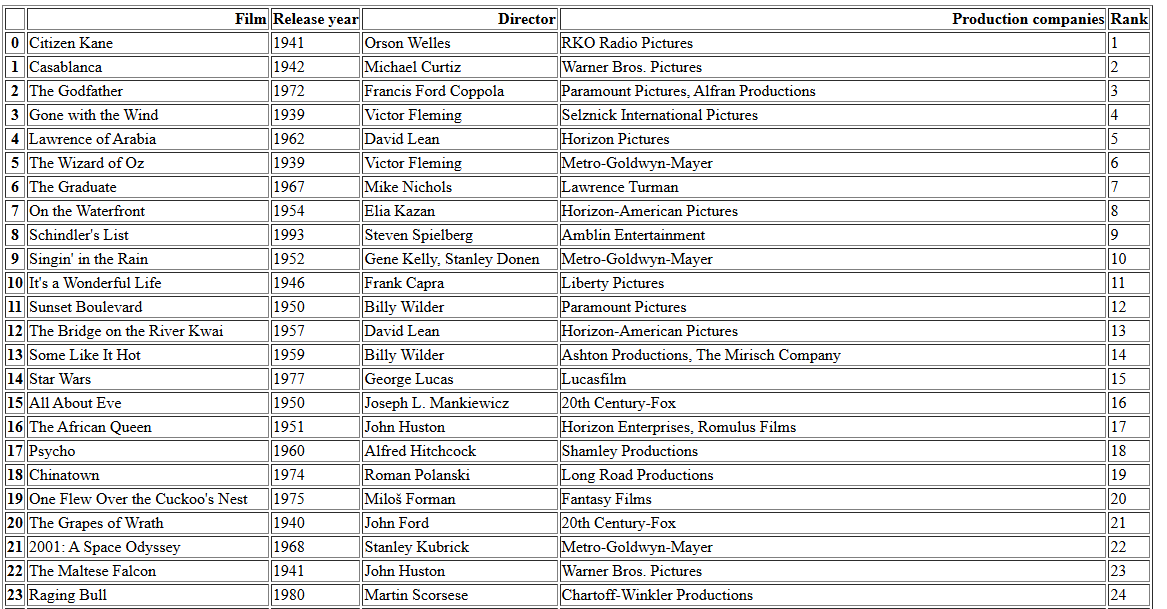

para editar apariencia se usa conocimiento en frond end

In [ ]:
#leer de nuevo el archivo exportado
pd.read_html('top_peliculas.html')

[                            Film  Release year              Director  \
 0                   Citizen Kane          1941          Orson Welles   
 1                     Casablanca          1942        Michael Curtiz   
 2                  The Godfather          1972  Francis Ford Coppola   
 3             Gone with the Wind          1939        Victor Fleming   
 4             Lawrence of Arabia          1962            David Lean   
 ..                           ...           ...                   ...   
 95                 The Searchers          1956             John Ford   
 96              Bringing Up Baby          1938          Howard Hawks   
 97                    Unforgiven          1992        Clint Eastwood   
 98  Guess Who's Coming to Dinner          1967        Stanley Kramer   
 99           Yankee Doodle Dandy          1942        Michael Curtiz   
 
                       Production companies  Rank  
 0                       RKO Radio Pictures     1  
 1                

conviertiendolo en archivo excel

In [ ]:
top_peliculas.to_excel('top_peliculas.xlsx',index=False)

In [ ]:
datos=pd.read_excel('top_peliculas.xlsx')

In [ ]:
datos.head()

,Film,Release year,Director,Production companies,Rank
0,Citizen Kane,1941,Orson Welles,RKO Radio Pictures,1
1,Casablanca,1942,Michael Curtiz,Warner Bros. Pictures,2
2,The Godfather,1972,Francis Ford Coppola,"Paramount Pictures, Alfran Productions",3
3,Gone with the Wind,1939,Victor Fleming,Selznick International Pictures,4
4,Lawrence of Arabia,1962,David Lean,Horizon Pictures,5


####Leyendo/Escribiendo archivos

en este caso veremos y analisaremos un archivo xml para intentar ver que es lo que contiene
xml= extensible marcas lenguage
lenguaje de marcacion extensiva
los archivos en su estructura es similar al html pero considerando que es mas denso que el html, tenemos llallave data que indica donde inicia y termina el documento
la llave row indica que inicia una nueva fila encapsulando dentro de esta llave, asi mismo tenemos mas llaves dentro de esta que identifican cada cosa dentro de la columna y fila

In [ ]:
#importanto y leyendo xml
datos_imdb=pd.read_xml('/content/imdb_top_1000.xml')

In [ ]:
datos_imdb.head(3)

,index,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [ ]:
##escribiendo eel archivo para un xml
datos_imdb.to_xml('peliculas_imdb.xml')

##¿que es XMl?

XML es un lenguaje de marcación que permite crear y describir datos de forma estructurada y estandarizada. Está compuesto por líneas de comando que utilizan tags (etiquetas) para definir elementos y atributos de los datos.

La estructura básica de un documento XML está formada por:

Una declaración inicial que indica la versión, el encoding y el tipo del documento.
Un elemento raíz que contiene todos los demás elementos del documento.
Elementos secundarios que pueden tener otros elementos o contenido de texto dentro de ellos.
Atributos que proporcionan información adicional sobre los elementos.
Un ejemplo sencillo de un documento XML es:




```
xml
<?xml version="1.0" encoding="UTF-8"?>
<animales>
  <animal nombre="Mel" tipo="perro" color="marron"/>
  <animal nombre="Vick" tipo="gato" color="blanco"/>
</animales>

```
En este ejemplo,

```
<animales>
```

 es el elemento raíz,

```
<animal>
```

 es un elemento secundario con tres atributos (nombre, tipo y color) y Mely Vick son el contenido de texto de los elementos.

Podemos encontrar más información sobre la estructura XML en la página: XML para principiantes - Soporte de Microsoft.
https://support.microsoft.com/es-es/office/xml-para-no-iniciados-a87d234d-4c2e-4409-9cbc-45e4eb857d44

######Desafio leer una tabla de una pagiona

Es el momento de poner a prueba los conocimientos desarrollados durante la clase.

Vanessa es una científica de datos que está haciendo algunos análisis con datos ambientales. Está desarrollando un proyecto para evaluar el impacto ambiental de las actividades humanas en diferentes países del mundo, pero para ello necesita estimaciones de población de esos países. Al buscar en Internet, encontró una tabla de estimaciones de población en un artículo de la página de Wikipedia.

Al igual que Vanessa, tu desafío es obtener un DataFrame de la tabla que contiene la información del número de habitantes de cada país.
https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_y_territorios_dependientes_por_poblaci%C3%B3n


En esta aula, aprendimos a:

Inspeccionar una página web;
Leer datos de una página web;
Escribir archivos HTML;
Comprender cómo está estructurado el formato XML;
Leer datos en formato XML;
Escribir archivos en formato XML.

 #Aula 5 banco de datos

nos piden que extraigamos un insede de formatos diferentes, cargando los datos en una base de datos para leerlos, trabajaremos sql dentro de python,podemos ejecutar diferentes tipos de consultas dado que es estructurado tablas, csv etc, pero tenemos que utilizar la biblioteca sql_admi para poder utilizar y crear tablas en

In [ ]:
import sqlalchemy

In [ ]:
from sqlalchemy import create_engine #este generara el entorno de base de datos

In [ ]:
from sqlalchemy import MetaData  #tendra un diccionario de todos los datos y sus columnas

In [ ]:
from sqlalchemy import Table #para ver y editar tabla

In [ ]:
from sqlalchemy import inspect #para inspeccionar que atributos tenemos en las tablas de la base de datos

In [ ]:
from sqlalchemy import text #para convertir a formato de texto dentro de las consultas

In [ ]:
#vams a ir por orden el primer paso es crear el motor que soportara ppara crear la tabla, usaremos
#uno de los modulos ya instalados en google colab que ya viviene de foult
#pero se puede usar otro a mysqlite pero existen otros para usar
engine=create_engine('sqlite:///:memory:')#aqui tenemos que especicar el rescurso de memoria o donde lo queremos ejecutar,  que vamos a utilizar en este caso usaremos el de google colab
#este motor se debe almacenar par siempre referenciarlo una variable, y esta es la base que nos permitira hacer una bassqlalchemy

### base de datis y sqlalchemy

Las bases de datos son sistemas que permiten el almacenamiento, organización y recuperación de información de forma estructurada y eficiente. Se utilizan ampliamente en muchas áreas, desde la gestión empresarial hasta la investigación científica. Una base de datos bien diseñada puede mejorar significativamente la eficiencia y precisión de las operaciones de una organización.

Existen bases de datos relacionales y no relacionales. Las bases de datos relacionales representan y almacenan datos en tablas. Las bases de datos no relacionales, también conocidas como bases de datos NoSQL (Not Only SQL - No Sólo SQL), utilizan una variedad de estructuras de datos, como documentos, gráfos o pares llave-valor.

Python ofrece varios paquetes y bibliotecas para trabajar con bases de datos, incluyendo SQLite, MySQL, PostgreSQL, Oracle, MongoDB, entre otros. Uno de los paquetes más comunes utilizados para trabajar con bases de datos relacionales en Python es el paquete sqlite3 que ofrece soporte a bases de datos SQLite. Esta base de datos es liviana e integrada, no requiere un servidor separado para ejecutarse y está instalada de forma nativa en Google Colab.

Para trabajar con esta base de datos, podemos usar SQLAlchemy, una biblioteca de mapeo objeto-relacional (ORM), que permite interactuar con bases de datos relacionales usando código Python. Proporciona una capa de abstracción que permite a los desarrolladores trabajar con objetos Python en lugar de lidiar directamente con las complejidades del lenguaje SQL (Structured Query Language - Lenguaje de consulta estructurado).

Uno de los principales beneficios de utilizar SQLAchemy es la capacidad de crear código más legible y fácil de mantener. Con SQLAlchemy, las operaciones de la base de datos se realizan utilizando métodos en objetos Python, lo que hace que el código sea más claro y menos propenso a errores.

Además, SQLAlchemy ofrece soporte a consultas complejas en bases de datos, lo que permite a los desarrolladores extraer fácilmente información relevante de grandes conjuntos de datos. Esto es especialmente útil en aplicaciones que necesitan manejar grandes cantidades de datos.

Puede encontrar más detalles sobre la biblioteca SQLAchemy en la siguiente documentación.
https://www.sqlalchemy.org/

####Escribiendo base de datos

In [ ]:
import pandas as pd

In [ ]:
archivo=('clientes_banco.csv')

In [ ]:
datos=pd.read_csv(archivo) ##es una variable dataframe que resivira todos los datos del archivo csv que recibamos

In [ ]:
datos.head(5)

,ID_Cliente,Edad,Grado_estudio,Estado_civil,Tamaño_familia,Categoria_de_renta,Ocupacion,Años_empleado,Rendimiento_anual,Tiene_carro,Vivienda
0,5008804,32,Nivel superior,Relación-estable,2,Empleado,Otro,12,427500.0,1,Departamento alquilado
1,5008805,32,Nivel superior,Relación-estable,2,Empleado,Otro,12,427500.0,1,Departamento alquilado
2,5008806,58,Nivel intermedio,Casado,2,Empleado,Seguridad,3,112500.0,1,Casa/Departamento propio
3,5008808,52,Nivel intermedio,Soltero,1,Business Partner,Ventas,8,270000.0,0,Casa/Departamento propio
4,5008809,52,Nivel intermedio,Soltero,1,Business Partner,Ventas,8,270000.0,0,Casa/Departamento propio


nosotros leeimos csv por que necsitamos que el contenido se encuentre en un dataframe para pasarlo a una sql no podemos pasarlo directamente a sql necesitamos primero pasarlo a un

In [ ]:
datos.to_sql('clientes', engine,index=False )##aqui pasamos la tabla del dataframe a formato a sql donde nombramos el archivo y especificamos deonde queremos que este corra el motor, luego para eleiminar el indice

438463

In [ ]:
inspector=inspect(engine)##le decimos que revise todo lo que hay dentro del motor engine, es decir que revise y nos de informacion de esto

In [ ]:
print(inspector.get_table_names())##este es un metodo que se encuentra dentro de la variable inspectinspector y solo las variables que resivan la variable inspect puedo utilizar el metodo get_table_name

['clientes']


###clausulas SQL

SQL (Structured Query Language - Lenguaje de consulta estructurado) es un lenguaje de consulta utilizado en bases de datos relacionales para insertar, actualizar, consultar y administrar datos.

Para hacer todo esto, existen cláusulas SQL, que son componentes fundamentales de las sentencias SQL, permitiendo especificar detalles sobre cómo se va a realizar la consulta u operación de la base de datos. Las cláusulas se utilizan para filtrar, ordenar, agrupar y limitar los resultados de la consulta.

Las sentencias SQL pueden estar compuestas por una o más cláusulas que proporcionan información adicional sobre lo que se supone que debe hacer la consulta. Las cláusulas más comunes son:

SELECT: especifica qué columnas deben seleccionarse en la consulta.
FROM: Especifica las tablas de la base de datos que se consultarán.
WHERE: Filtra los resultados de la consulta según una o más condiciones especificadas.
ORDER BY: Ordena los resultados de la consulta en orden ascendente o descendente según una o más columnas.
GROUP BY: agrupa los resultados de la consulta basados en una o más columnas.
LIMIT: limita el número de filas devueltas por los resultados de la consulta.
Tenemos un ejemplo sencillo de sintaxis SQL que utiliza el comando SELECT para consultar datos de una tabla de empleados en una base de datos:




```
SELECT nombre, apellido, salario
FROM empleados
WHERE departamento = 'ventas'
```

En esta declaración SQL, la cláusula SELECT se utiliza para especificar las columnas que desea consultar de la tabla "empleados", incluyendo "nombre", "apellido" y "salario". La cláusula FROM se utiliza para especificar la tabla que se desea consultar, que en este caso es "empleados".

La cláusula WHERE se utiliza para filtrar los resultados de la consulta según una condición específica. En este ejemplo, la condición es departamento = 'ventas', lo que significa que la consulta solo devolverá empleados que trabajan en el departamento de ventas.

En el próximo vídeo aprenderemos a utilizar algunas de estas cláusulas para realizar las primeras consultas SQL en la tabla que contiene datos de clientes de una institución financiera.




##Leyendo uuna consulta sql


ququremos fifiltrar solo una categocategoria por lo tanto vamos ausausar el termijo query


In [ ]:
query='SELECT * FROM clientes WHERE Categoria_de_renta= "Empleado"'#*usamos asterisco para seleccionar todas las columnas o podemos poner columna por clumnclumna luego del select, de ahi ponemos el from es la tabla donde lo sacaremos, where el parametro o columna donde esta la informacion con un fifiltro que lo que queremos que busque es empleado en categorias en renta

una simple y mortal query que usaremos en nuestro dia dia

ahora como hacemos para leer con pandas consultas con sql

llenado entre parentesis aql= a la variable que asignamos nuestra representacion de sql en este caso query

In [ ]:

empleados=pd.read_sql(sql=text(query), con = engine.connect())# importamos el text dado que apartir de la nueva vercion de sqlalchemy es necesario usar este metodo, nosotros sabemos que sql es un texto, pero esta varibal de text nos dice que queremos convertirlo a un Tipo especial de texto
#que sqlalchemy suele trabajar, aqui pasamos la consulta quueremos leer
#en nuestra ecuacion no se encuentra el motor donde se encuentra la tabla pero si se encuentra la tabla
#para esto nosotros vamos a adicionar otro parametro "con" coneccion donde indicaremos donde esta la consulta en el motor que hemos creado
#lo que hacemos es que se conecte al motor y en este motor ejecuta la query, buscnado lo especificado y filtrnado los datos

In [ ]:
type(empleados)

pandas.core.frame.DataFrame

In [ ]:
empleados

,ID_Cliente,Edad,Grado_estudio,Estado_civil,Tamaño_familia,Categoria_de_renta,Ocupacion,Años_empleado,Rendimiento_anual,Tiene_carro,Vivienda
0,5008804,32,Nivel superior,Relación-estable,2,Empleado,Otro,12,427500.0,1,Departamento alquilado
1,5008805,32,Nivel superior,Relación-estable,2,Empleado,Otro,12,427500.0,1,Departamento alquilado
2,5008806,58,Nivel intermedio,Casado,2,Empleado,Seguridad,3,112500.0,1,Casa/Departamento propio
3,5008815,46,Nivel superior,Casado,2,Empleado,Contabilidad,2,270000.0,1,Casa/Departamento propio
4,5112956,46,Nivel superior,Casado,2,Empleado,Contabilidad,2,270000.0,1,Casa/Departamento propio
...,...,...,...,...,...,...,...,...,...,...,...
226054,6837905,43,Nivel intermedio,Casado,3,Empleado,Otro,7,355050.0,1,Casa/Departamento propio
226055,6837906,43,Nivel intermedio,Casado,3,Empleado,Otro,7,355050.0,1,Casa/Departamento propio
226056,6839936,34,Nivel intermedio,Casado,3,Empleado,Construcción Civil,5,135000.0,1,Casa/Departamento propio
226057,6840222,43,Nivel intermedio,Soltero,1,Empleado,Construcción Civil,8,103500.0,0,Casa/Departamento propio


tenemos ya un filtro teniendo un tipo de clientes especifico

In [ ]:
empleados.to_sql('empleados',con= engine.connect(),index=False)#siendo lo mismo que hicimos anterior mente, lo que nos dice generaremos
#un archivo de los empleados, guardado en el motor enigne y sin generar la tabla index

226059

ahora leeremos la tabla que acabamos de crear no usaremos pd.read_sql dado que esta es para una consulta, ejecutoar un pedaso de la tabla

si queremos ller la tabla usamos el siguiente metodo

In [ ]:
pd.read_sql_table('empleados',con=engine.connect())
#aqui con la funcion read_sql_teable, llamamos aque leea toda la tabla para eso debemos agregar el nombre y el motor donde se encuentra

,ID_Cliente,Edad,Grado_estudio,Estado_civil,Tamaño_familia,Categoria_de_renta,Ocupacion,Años_empleado,Rendimiento_anual,Tiene_carro,Vivienda
0,5008804,32,Nivel superior,Relación-estable,2,Empleado,Otro,12,427500.0,1,Departamento alquilado
1,5008805,32,Nivel superior,Relación-estable,2,Empleado,Otro,12,427500.0,1,Departamento alquilado
2,5008806,58,Nivel intermedio,Casado,2,Empleado,Seguridad,3,112500.0,1,Casa/Departamento propio
3,5008815,46,Nivel superior,Casado,2,Empleado,Contabilidad,2,270000.0,1,Casa/Departamento propio
4,5112956,46,Nivel superior,Casado,2,Empleado,Contabilidad,2,270000.0,1,Casa/Departamento propio
...,...,...,...,...,...,...,...,...,...,...,...
226054,6837905,43,Nivel intermedio,Casado,3,Empleado,Otro,7,355050.0,1,Casa/Departamento propio
226055,6837906,43,Nivel intermedio,Casado,3,Empleado,Otro,7,355050.0,1,Casa/Departamento propio
226056,6839936,34,Nivel intermedio,Casado,3,Empleado,Construcción Civil,5,135000.0,1,Casa/Departamento propio
226057,6840222,43,Nivel intermedio,Soltero,1,Empleado,Construcción Civil,8,103500.0,0,Casa/Departamento propio


ahora s queremos fitrar y leer solo algunas columnas de nuestra tabla sql se hara asi:

In [ ]:
pd.read_sql_table('empleados',con=engine.connect(),columns=['ID_Cliente','Grado_estudio','Rendimiento_anual'])

,ID_Cliente,Grado_estudio,Rendimiento_anual
0,5008804,Nivel superior,427500.0
1,5008805,Nivel superior,427500.0
2,5008806,Nivel intermedio,112500.0
3,5008815,Nivel superior,270000.0
4,5112956,Nivel superior,270000.0
...,...,...,...
226054,6837905,Nivel intermedio,355050.0
226055,6837906,Nivel intermedio,355050.0
226056,6839936,Nivel intermedio,135000.0
226057,6840222,Nivel intermedio,103500.0


##Actualizacion de la base de datos

como podemos actualizar una columna o una fila

uniciamos creando una query de nuestra base de datos clientes para consultar

In [ ]:
query='SELECT * FROM clientes'

In [ ]:
pd.read_sql(sql=text(query), con = engine.connect())

,ID_Cliente,Edad,Grado_estudio,Estado_civil,Tamaño_familia,Categoria_de_renta,Ocupacion,Años_empleado,Rendimiento_anual,Tiene_carro,Vivienda
0,5008804,32,Nivel superior,Relación-estable,2,Empleado,Otro,12,427500.0,1,Departamento alquilado
1,5008805,32,Nivel superior,Relación-estable,2,Empleado,Otro,12,427500.0,1,Departamento alquilado
2,5008806,58,Nivel intermedio,Casado,2,Empleado,Seguridad,3,112500.0,1,Casa/Departamento propio
3,5008808,52,Nivel intermedio,Soltero,1,Business Partner,Ventas,8,270000.0,0,Casa/Departamento propio
4,5008809,52,Nivel intermedio,Soltero,1,Business Partner,Ventas,8,270000.0,0,Casa/Departamento propio
...,...,...,...,...,...,...,...,...,...,...,...
438458,6840104,62,Nivel intermedio,Divorciado,1,Pensionista,Otro,0,135000.0,0,Casa/Departamento propio
438459,6840222,43,Nivel intermedio,Soltero,1,Empleado,Construcción Civil,8,103500.0,0,Casa/Departamento propio
438460,6841878,22,Nivel superior,Soltero,1,Business Partner,Ventas,1,54000.0,0,Vive con los padres
438461,6842765,59,Nivel intermedio,Casado,2,Pensionista,Otro,0,72000.0,0,Casa/Departamento propio


lo que vmaos hacer es borrar un registro en este caso como borramos a un cliete
cuando creamos o eliminemos una dao de una variable de datos puede este generar un error por lo tanto necesitamos saber como detectar ese herror importando una biblioteca de sqlalquemy que meda informacion de ese error

In [ ]:
#borrando registro
from sqlalchemy.exc import SQLAlchemyError# ESTE METODO NOS DICE EL ERROR DE INFORMACION DENTRO DE SQLALCHEMY
query="DELETE FROM clientes WHERE ID_Cliente =5008804 "
try:
  r_set=engine.connect().execute(text(query))
except SQLAlchemyError as e:
    print(e)
else:
  print('numero de registro borrado',r_set.rowcount)# por que 'r'por que vamos a crear una variable que va a recibir la ejecucion de la query fue exitosa

numero de registro borrado 1


hemos generado nuestra query como tenxto borrando un dato de la base de datos, en el try estamos tratando de ejecutar en la que no devuelve el registro dado que no es un select si no un delate donde no devuelve registro, para ejecutarla nos conectamos primero al motoro y luego ejecutamos con el metodo execute a la query que queremos ejecutar

ahora vamos a confirmar que si se borro el registro

In [ ]:
pd.read_sql('clientes', con = engine.connect())

,ID_Cliente,Edad,Grado_estudio,Estado_civil,Tamaño_familia,Categoria_de_renta,Ocupacion,Años_empleado,Rendimiento_anual,Tiene_carro,Vivienda
0,5008805,32,Nivel superior,Relación-estable,2,Empleado,Otro,12,427500.0,1,Departamento alquilado
1,5008806,58,Nivel intermedio,Casado,2,Empleado,Seguridad,3,112500.0,1,Casa/Departamento propio
2,5008808,52,Nivel intermedio,Soltero,1,Business Partner,Ventas,8,270000.0,0,Casa/Departamento propio
3,5008809,52,Nivel intermedio,Soltero,1,Business Partner,Ventas,8,270000.0,0,Casa/Departamento propio
4,5008810,52,Nivel intermedio,Soltero,1,Business Partner,Ventas,8,270000.0,0,Casa/Departamento propio
...,...,...,...,...,...,...,...,...,...,...,...
438457,6840104,62,Nivel intermedio,Divorciado,1,Pensionista,Otro,0,135000.0,0,Casa/Departamento propio
438458,6840222,43,Nivel intermedio,Soltero,1,Empleado,Construcción Civil,8,103500.0,0,Casa/Departamento propio
438459,6841878,22,Nivel superior,Soltero,1,Business Partner,Ventas,1,54000.0,0,Vive con los padres
438460,6842765,59,Nivel intermedio,Casado,2,Pensionista,Otro,0,72000.0,0,Casa/Departamento propio


hemos borrado completamente corrctamente

ahora queremos ahcer un up grade de datos actualizandolos o agregando

para este ejemplo actualizaremos el grado de estudios de nivel intermedio a superiro de esta manera

In [ ]:
#actualizando registro
query="UPDATE clientes SET Grado_estudio= 'Nivel superior' WHERE ID_Cliente =5008808 "
try:
  r_set=engine.connect().execute(text(query))
except SQLAlchemyError as e:
    print(e)
else:
  print('numero de registro borrado',r_set.rowcount)


numero de registro borrado 1


DONDE LA EJECUCION SE LA MISMA DADO QUE ESTA ES LA QUERY PARA ACTUALIZAR EL REGISTRO

In [ ]:
pd.read_sql('clientes', con = engine.connect())

,ID_Cliente,Edad,Grado_estudio,Estado_civil,Tamaño_familia,Categoria_de_renta,Ocupacion,Años_empleado,Rendimiento_anual,Tiene_carro,Vivienda
0,5008805,32,Nivel superior,Relación-estable,2,Empleado,Otro,12,427500.0,1,Departamento alquilado
1,5008806,58,Nivel intermedio,Casado,2,Empleado,Seguridad,3,112500.0,1,Casa/Departamento propio
2,5008808,52,Nivel superior,Soltero,1,Business Partner,Ventas,8,270000.0,0,Casa/Departamento propio
3,5008809,52,Nivel intermedio,Soltero,1,Business Partner,Ventas,8,270000.0,0,Casa/Departamento propio
4,5008810,52,Nivel intermedio,Soltero,1,Business Partner,Ventas,8,270000.0,0,Casa/Departamento propio
...,...,...,...,...,...,...,...,...,...,...,...
438457,6840104,62,Nivel intermedio,Divorciado,1,Pensionista,Otro,0,135000.0,0,Casa/Departamento propio
438458,6840222,43,Nivel intermedio,Soltero,1,Empleado,Construcción Civil,8,103500.0,0,Casa/Departamento propio
438459,6841878,22,Nivel superior,Soltero,1,Business Partner,Ventas,1,54000.0,0,Vive con los padres
438460,6842765,59,Nivel intermedio,Casado,2,Pensionista,Otro,0,72000.0,0,Casa/Departamento propio


In [ ]:
inspector=inspect(engine)

In [ ]:
print(inspector.get_table_names())

['clientes', 'empleados', 'empleados2']


###manipulando una base de datos

Es el momento de poner a prueba tus conocimientos adquiridos durante la clase.

Usted es responsable de crear una base de datos local de clientes para una institución financiera. Disponemos del archivo CSV con los datos de los clientes.

https://github.com/alura-es-cursos/1980-Pandas_IO/raw/clientes_banco/clientes_banco.csv.zip

Tu misión es:

Crear la base de datos local con la biblioteca SQLAlchemy.
Escribir los datos del archivo CSV en esta base de datos local.
Realizar tres actualizaciones en la base de datos:
Actualizar el registro del cliente ID 6840104 cuyo rendimiento anual cambió a 300000.
Eliminar el registro de cliente ID 5008809, ya que esta persona ya no tiene cuenta en la institución financiera.
Crear un nuevo registro de cliente siguiendo las especificaciones a continuación:
ID_cliente: 6850985
Edad: 33
Grado_estudio: Doctorado
Estado_civil: Soltero
Tamaño_familia: 1
Categoria_de_renta: Empleado
Ocupacion: TI
Años_empleado: 2
Rendimiento_anual: 290000
Tiene_carro: 0
Vivienda: Casa/Departamento propio
Consejo importante: Para agregar un nuevo cliente a la tabla, use la cláusula INSERT INTO seguida del nombre de la tabla y luego especifique los nombres de las columnas de la tabla entre paréntesis. Utilice la cláusula VALUES y luego pase entre paréntesis los nuevos valores para este nuevo registro. Asegúrese de que los valores estén en el orden correcto y en el formato adecuado para cada columna.

###proyecto final

https://github.com/alura-es-cursos/1980-Pandas_IO/raw/1980-ProyectoFinal/1980-ProyectoFinal.zip

En esta aula, aprendimos a:

Crear una base de datos local;
Escribir en una base de datos;
Realizar lectura en una consulta SQL;
Actualizar una base de datos.